<a href="https://colab.research.google.com/github/Jamshidbek077/Avia_company_cilent_satisfaction/blob/master/Avia_companiyada_mijozlarning_qoniqishi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder,LabelEncoder,StandardScaler
LE=LabelEncoder()
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegressionCV
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

# Train_Data

In [7]:
train_data=pd.read_csv('/content/train_dataset.csv',index_col=0)
train_data.head(20)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
6,Male,Loyal Customer,30,Personal Travel,Eco Plus,1034,2,4,2,2,...,5,4,5,5,4,4,5,0,0.0,0
7,Male,Loyal Customer,38,Business travel,Eco,826,5,1,1,1,...,5,1,4,4,5,4,5,2,5.0,1
8,Female,Loyal Customer,39,Business travel,Eco Plus,162,3,4,4,4,...,3,3,5,5,1,3,3,0,0.0,1
9,Male,disloyal Customer,43,Business travel,Business,541,2,2,2,5,...,3,5,2,5,4,4,3,0,0.0,0


In [8]:
cols=train_data.columns
train_data.shape
cols

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# changed this data_columns str values

In [9]:
changing_colls=['Gender', 'Customer Type', 'Type of Travel', 'Class']
changing_colls

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [10]:
for coll in changing_colls:
  unique=train_data[coll].unique()
  index=range(len(unique))

  train_data[coll]=train_data[coll].replace(unique,index)

In [11]:
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,33,0,0,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,1,1,49,0,1,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,1,1,43,0,0,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,1,1,27,0,1,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,0,1,11,1,0,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,1,54,1,0,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,1,1,54,0,2,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,0,1,46,0,1,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [12]:
# train_data=train_data['']
# # Bunda noll qiymatlar bor yoqligiga tekshirdik

In [13]:
train_data.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [14]:
def drop_nan_duplicated(df):
  df.dropna(inplace=True)
  df.drop_duplicates(inplace=True)
  return df

In [15]:
train_data[['Arrival Delay in Minutes']]=train_data[['Arrival Delay in Minutes']].fillna(train_data['Arrival Delay in Minutes'].mean())

In [16]:
drop_nan_duplicated(train_data)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,33,0,0,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,1,1,49,0,1,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,1,1,43,0,0,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,1,1,27,0,1,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,0,1,11,1,0,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,1,54,1,0,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,1,1,54,0,2,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,0,1,46,0,1,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [17]:
from sklearn import metrics
train_data.corrwith(train_data.satisfaction)

Gender                              -0.001279
Customer Type                        0.178995
Age                                  0.141822
Type of Travel                      -0.484177
Class                                0.346460
Flight Distance                      0.302166
Inflight wifi service                0.279029
Departure/Arrival time convenient   -0.068655
Ease of Online booking               0.165808
Gate location                        0.009439
Food and drink                       0.211445
Online boarding                      0.503101
Seat comfort                         0.343875
Inflight entertainment               0.401330
On-board service                     0.323564
Leg room service                     0.324169
Baggage handling                     0.246558
Checkin service                      0.232809
Inflight service                     0.240542
Cleanliness                          0.312464
Departure Delay in Minutes          -0.042850
Arrival Delay in Minutes          

# Test data

In [18]:
test_data=pd.read_csv('/content/test_dataset.csv',index_col=0)
test_data.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
6,Male,Loyal Customer,55,Business travel,Eco,965,3,3,4,3,...,3,3,2,2,4,2,4,3,0,0.0
7,Male,disloyal Customer,26,Business travel,Eco,508,3,0,3,5,...,1,1,2,5,5,3,5,1,0,0.0
8,Female,Loyal Customer,39,Business travel,Business,3799,2,2,2,2,...,5,4,4,4,4,3,4,4,0,0.0
9,Female,Loyal Customer,34,Personal Travel,Eco,350,2,1,2,2,...,3,3,2,4,2,4,2,3,0,0.0


In [19]:
for coll in changing_colls:
  unique=test_data[coll].unique()
  index=range(len(unique))

  test_data[coll]=train_data[coll].replace(unique,index)

In [20]:
changing_colls

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [21]:
test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,25,0.0,0.0,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,1.0,1.0,49,0.0,1.0,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,1.0,1.0,51,0.0,0.0,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,1.0,1.0,34,0.0,1.0,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,0.0,1.0,34,1.0,0.0,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.0,1.0,26,0.0,2.0,2949,3,3,4,3,...,4,4,1,4,2,3,1,4,29,36.0
3997,1.0,1.0,23,1.0,2.0,268,1,3,0,3,...,2,2,3,2,4,2,3,2,0,0.0
3998,1.0,1.0,38,0.0,1.0,602,2,1,1,1,...,2,2,1,1,2,2,3,2,23,45.0


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             9514 non-null   int64  
 1   Customer Type                      9514 non-null   int64  
 2   Age                                9514 non-null   int64  
 3   Type of Travel                     9514 non-null   int64  
 4   Class                              9514 non-null   int64  
 5   Flight Distance                    9514 non-null   int64  
 6   Inflight wifi service              9514 non-null   int64  
 7   Departure/Arrival time convenient  9514 non-null   int64  
 8   Ease of Online booking             9514 non-null   int64  
 9   Gate location                      9514 non-null   int64  
 10  Food and drink                     9514 non-null   int64  
 11  Online boarding                    9514 non-null   int6

In [23]:
train_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [24]:
train_data.value_counts()



Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction
0       0              8    0               1      1310             2                      0                                  2                       3              3               2                3             3                       3                 5                 5                 5                4                 3            0                           0.0                       0               1
1       1              28   1               0      2583             2                      3                                  3                       3              3               5   

In [25]:
train_data.corr()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.023840,0.001271,-0.018910,0.009777,-0.015666,-0.009479,-0.013211,-0.006653,0.017158,...,0.009715,-0.006079,-0.022264,-0.040266,-0.021037,-0.048869,0.008899,-0.031330,-0.026089,-0.001279
Customer Type,-0.023840,1.000000,0.289833,0.281619,0.135904,0.224320,0.002027,0.194813,0.015999,0.001159,...,0.126480,0.065533,0.070590,-0.012244,0.033684,-0.023618,0.103397,-0.003189,-0.001656,0.178995
Age,0.001271,0.289833,1.000000,-0.073155,0.114662,0.110250,0.018611,0.036332,0.026315,-0.013642,...,0.096384,0.074194,0.057368,-0.035777,0.042230,-0.036019,0.062842,-0.014340,-0.017742,0.141822
Type of Travel,-0.018910,0.281619,-0.073155,1.000000,-0.376665,-0.281429,-0.101743,0.242978,-0.117294,-0.035717,...,-0.185476,-0.078280,-0.153770,-0.035787,0.006426,-0.038234,-0.110449,-0.007361,-0.008006,-0.484177
Class,0.009777,0.135904,0.114662,-0.376665,1.000000,0.276799,0.033271,-0.048693,0.063503,0.003720,...,0.155631,0.125290,0.128495,0.089139,0.088355,0.082493,0.108373,-0.011470,-0.011555,0.346460
Flight Distance,-0.015666,0.224320,0.110250,-0.281429,0.276799,1.000000,0.002550,-0.023248,0.055180,0.020113,...,0.152887,0.122041,0.144642,0.073954,0.069407,0.060953,0.102076,0.012677,0.004955,0.302166
Inflight wifi service,-0.009479,0.002027,0.018611,-0.101743,0.033271,0.002550,1.000000,0.356724,0.730954,0.362512,...,0.197396,0.130324,0.169490,0.124087,0.042393,0.112153,0.119903,-0.019515,-0.022393,0.279029
Departure/Arrival time convenient,-0.013211,0.194813,0.036332,0.242978,-0.048693,-0.023248,0.356724,1.000000,0.450772,0.477813,...,-0.009431,0.071705,0.027709,0.076570,0.083233,0.066467,0.000574,0.015922,0.013770,-0.068655
Ease of Online booking,-0.006653,0.015999,0.026315,-0.117294,0.063503,0.055180,0.730954,0.450772,1.000000,0.477192,...,0.043564,0.053557,0.114963,0.046040,0.016934,0.034287,0.007997,0.002361,0.000647,0.165808
Gate location,0.017158,0.001159,-0.013642,-0.035717,0.003720,0.020113,0.362512,0.477813,0.477192,1.000000,...,0.001653,-0.014122,0.009527,0.000587,-0.036432,0.005832,-0.013527,0.009284,0.006515,0.009439


In [26]:
train_data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,...,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,0.515871,0.830986,39.370822,0.294618,0.643368,1229.935674,2.782846,3.073891,2.800294,2.983393,...,3.403931,3.452701,3.416754,3.674164,3.357789,3.679840,3.314484,14.411078,14.691705,0.496952
std,0.499774,0.374784,14.900369,0.455895,0.609928,1021.709952,1.358226,1.522978,1.417798,1.281120,...,1.331704,1.275191,1.307804,1.189936,1.260052,1.173519,1.312077,38.693603,39.053752,0.500017
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,421.250000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,0.000000,1.000000,866.500000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,1.000000,1801.750000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,80.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [27]:
train_data.dropna()
test_data.dropna()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,25,0.0,0.0,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,1.0,1.0,49,0.0,1.0,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,1.0,1.0,51,0.0,0.0,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,1.0,1.0,34,0.0,1.0,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,0.0,1.0,34,1.0,0.0,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.0,1.0,26,0.0,2.0,2949,3,3,4,3,...,4,4,1,4,2,3,1,4,29,36.0
3997,1.0,1.0,23,1.0,2.0,268,1,3,0,3,...,2,2,3,2,4,2,3,2,0,0.0
3998,1.0,1.0,38,0.0,1.0,602,2,1,1,1,...,2,2,1,1,2,2,3,2,23,45.0


In [28]:
train_data['Online boarding' ] #  online boarding bu haligi 5 yuldiz bilan xizmat sifatini baholash

id
1        2
2        5
3        4
4        2
5        3
        ..
9996     5
9997     3
9998     4
9999     4
10000    3
Name: Online boarding, Length: 9514, dtype: int64

In [29]:
from sklearn import metrics
train_data.corrwith(train_data.satisfaction)

Gender                              -0.001279
Customer Type                        0.178995
Age                                  0.141822
Type of Travel                      -0.484177
Class                                0.346460
Flight Distance                      0.302166
Inflight wifi service                0.279029
Departure/Arrival time convenient   -0.068655
Ease of Online booking               0.165808
Gate location                        0.009439
Food and drink                       0.211445
Online boarding                      0.503101
Seat comfort                         0.343875
Inflight entertainment               0.401330
On-board service                     0.323564
Leg room service                     0.324169
Baggage handling                     0.246558
Checkin service                      0.232809
Inflight service                     0.240542
Cleanliness                          0.312464
Departure Delay in Minutes          -0.042850
Arrival Delay in Minutes          

In [30]:
train_x = train_data.drop("satisfaction", axis=1)
train_y = train_data.satisfaction

In [43]:
test_data=test_data.dropna()

In [44]:
test_data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

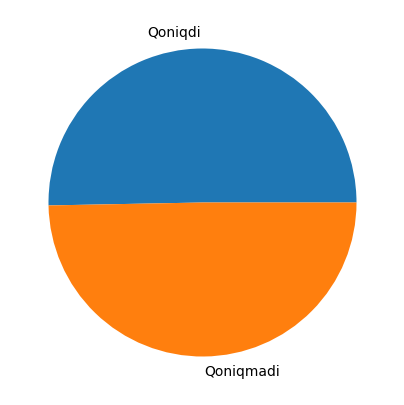

In [53]:
satisfaction_rate =train_data['satisfaction'].value_counts()/len(train_data)*100
plt.figure(figsize=(5,5))
plt.pie(satisfaction_rate, labels=['Qoniqdi','Qoniqmadi'])
plt.show()

In [55]:
X = train_data.drop(["satisfaction"], axis=1)
y =train_data['satisfaction']


In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [79]:
def model(X_train, X_test, y_train, y_test,model):

    model= model()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [80]:
x1 = [model(X_train, X_test, y_train, y_test,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor,LogisticRegression,XGBClassifier]]
x1

-----------------
LinearRegression()
-----------------
MSE: 0.10567061024730316
MAE: 0.2435585253526798
R2 : 57.73 %
-----------------
Lasso()
-----------------
MSE: 0.24999168588925685
MAE: 0.4999821523912378
R2 : -0.0 %
-----------------
Ridge()
-----------------
MSE: 0.10567001093427238
MAE: 0.24356821990641062
R2 : 57.73 %
-----------------
ElasticNet()
-----------------
MSE: 0.24999168588925685
MAE: 0.4999821523912378
R2 : -0.0 %
-----------------
RandomForestRegressor()
-----------------
MSE: 0.040994640042038885
MAE: 0.08809248554913295
R2 : 83.6 %
-----------------
DecisionTreeRegressor()
-----------------
MSE: 0.07619548081975827
MAE: 0.07619548081975827
R2 : 69.52 %
-----------------
KNeighborsRegressor()
-----------------
MSE: 0.06469784550709407
MAE: 0.11918024172359433
R2 : 74.12 %
-----------------
GradientBoostingRegressor()
-----------------
MSE: 0.048795560417817
MAE: 0.13433290802397152
R2 : 80.48 %
-----------------
LogisticRegression()
-----------------
MSE: 0.11928

[None, None, None, None, None, None, None, None, None, None]

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       957
           1       0.96      0.94      0.95       946

    accuracy                           0.95      1903
   macro avg       0.96      0.95      0.95      1903
weighted avg       0.96      0.95      0.95      1903

Model accuracy: 0.954808197582764
R2 : 81.92 %


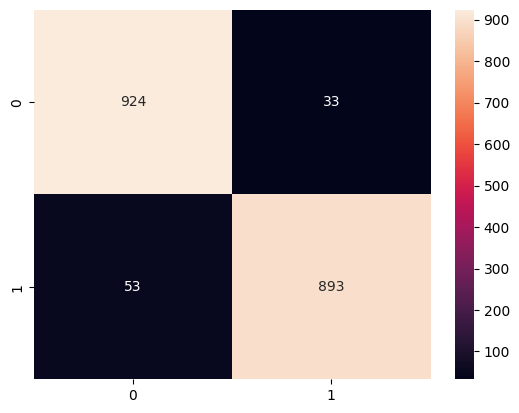

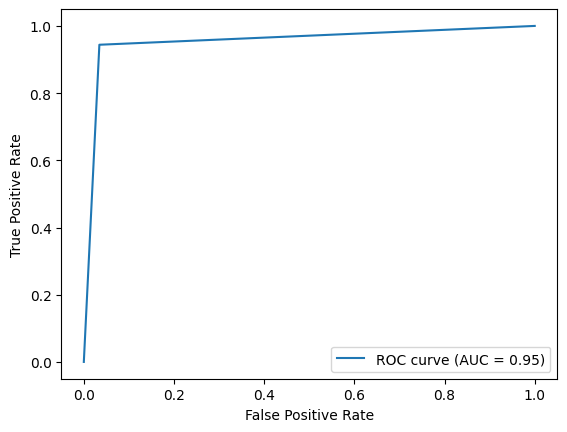

In [78]:
import seaborn as sns
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Model accuracy
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))
print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()